In [19]:
import pandas as pd
import json
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns

In [42]:
df = pd.read_csv('csv_outputs/essay_scores_aggregated.csv')
sorted_df = df.sort_values(by='id')  # Replace 'column_name' with the actual column name
sorted_df.to_csv('csv_outputs/essay_scores_aggregated.csv', index=False)

In [15]:
df.describe()

,id,temperature,prompt,intro,effect,negotiation,feedback,conclusion,total
count,252.000000,252.000000,252.0,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,15.500000,0.844444,1.0,9.242063,28.456349,27.884921,18.496032,8.583333,92.662698
std,8.749502,0.386950,0.0,0.558292,0.933058,1.335484,0.844471,0.854447,4.220199
min,1.000000,0.100000,1.0,7.000000,25.000000,27.000000,18.000000,8.000000,85.000000
25%,8.500000,0.500000,1.0,9.000000,28.000000,27.000000,18.000000,8.000000,90.000000
50%,15.500000,1.000000,1.0,9.000000,28.000000,27.000000,18.000000,8.000000,90.000000
75%,22.500000,1.000000,1.0,10.000000,29.000000,30.000000,19.000000,9.000000,96.000000
max,30.000000,1.500000,1.0,10.000000,30.000000,30.000000,20.000000,10.000000,100.000000


In [ ]:
"""AI Graders"""
# gpt-4o - [temperature = 1.0, 0.5, 0.1, 1.5]
# gpt-4o-mini - [temperature = 1.0]
# claude-3-5-sonnet-20241022 - [temperature = 1.0]
# gemini-1.5-flash - [temperature = 1.0]
# cograder

# Note: the filtered_df look at (gpt-4o, claude, gemini, cograder)

"""Human Grader"""
# manual

In [47]:
target_models = ['gpt-4o', 'claude-3-5-sonnet-20241022', 'gemini-1.5-flash', ]

filtered_df = df[((df['model'].isin(target_models)) & (df['temperature'] == 1.0)) | ((df['company'] == 'cograder') & (df['model'] == 'ai-rubric'))]
print(filtered_df)


     id   company                       model  temperature  prompt  intro  \
0     1    openai                      gpt-4o          1.0     1.0    9.0   
4     1    claude  claude-3-5-sonnet-20241022          1.0     1.0   10.0   
7     1    gemini            gemini-1.5-flash          1.0     1.0    9.0   
9     2    gemini            gemini-1.5-flash          1.0     1.0    7.0   
15    2    openai                      gpt-4o          1.0     1.0    9.0   
..   ..       ...                         ...          ...     ...    ...   
303  26  cograder                   ai-rubric          NaN     NaN    NaN   
304  27  cograder                   ai-rubric          NaN     NaN    NaN   
305  28  cograder                   ai-rubric          NaN     NaN    NaN   
306  29  cograder                   ai-rubric          NaN     NaN    NaN   
307  30  cograder                   ai-rubric          NaN     NaN    NaN   

     effect  negotiation  feedback  conclusion  total  \
0      28.0       

In [48]:
filtered_df = filtered_df.sort_values(by='id')
filtered_df.head()

,id,company,model,temperature,prompt,intro,effect,negotiation,feedback,conclusion,total,comment
0,1,openai,gpt-4o,1.0,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay effectively outlines the importance...
7,1,gemini,gemini-1.5-flash,1.0,1.0,9.0,28.0,27.0,18.0,8.0,90,This is a well-written essay demonstrating a g...
280,1,cograder,ai-rubric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,NaN
4,1,claude,claude-3-5-sonnet-20241022,1.0,1.0,10.0,30.0,30.0,20.0,10.0,100,Exceptional essay that demonstrates deep under...
9,2,gemini,gemini-1.5-flash,1.0,1.0,7.0,28.0,27.0,18.0,8.0,88,Your essay demonstrates a good understanding o...


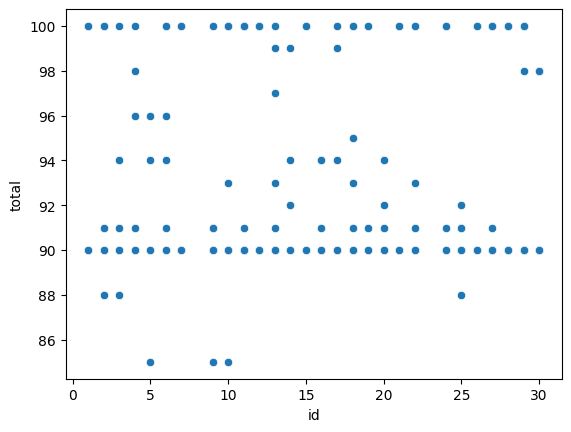

In [35]:
sns.scatterplot(x="id", y="total", data=df);

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_87734/708156244.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df['id'], y=filtered_df['total'], showmeans=True,


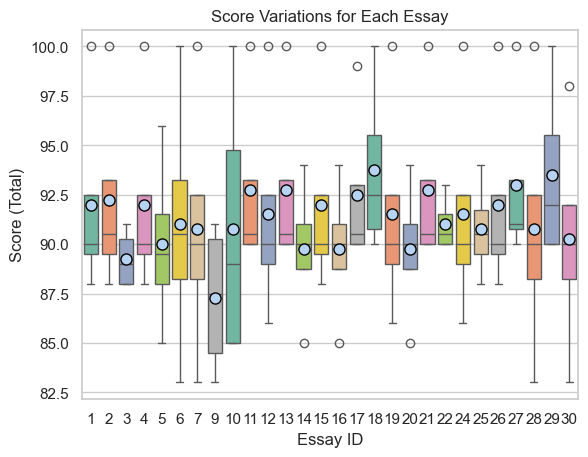

In [63]:
sns.boxplot(x=filtered_df['id'], y=filtered_df['total'], showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "#B7D3F2", "markeredgecolor": "black", "markersize": 8},
        palette="Set2")

# name the x-axis: essay id
# name the y-axis: total score
# add a title: Score Variation between GPT, Claude, Gemini, Cograder
plt.xlabel('Essay ID')
plt.ylabel('Score (Total)')
plt.title('Score Variations for Each Essay')
plt.savefig('score_variation_per_essay.png', format='png')

# Show the plot
plt.show()

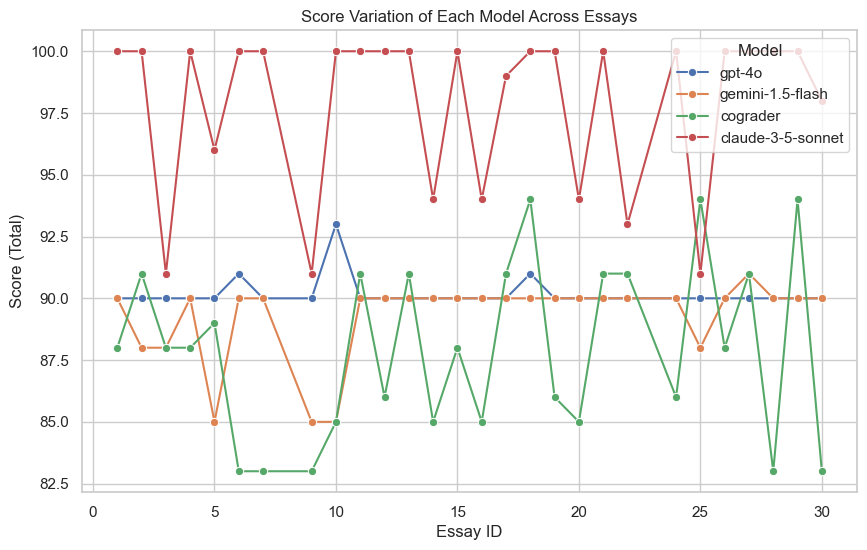

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping the names (example dictionary, adjust as needed)
name_mapping = {'ai-rubric': 'cograder', 'claude-3-5-sonnet-20241022':'claude-3-5-sonnet'}

# Modify the 'model' column in the DataFrame to reflect the new naming
filtered_df['model'] = filtered_df['model'].replace(name_mapping)

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.lineplot(
    data=filtered_df,
    x='id',
    y='total',
    hue='model',
    marker='o'
)

# Customize plot
plt.title('Score Variation of Each Model Across Essays')
plt.xlabel('Essay ID')
plt.ylabel('Score (Total)')
plt.legend(title='Model', loc='upper right')  # Adjust legend location
plt.savefig('score_variation_per_model.png', format='png')

# Show the plot
plt.show()


In [69]:
gpt = df[(df['company'] == 'openai') & (df['model'] == 'gpt-4o')]
gpt = gpt.sort_values(by='id')
gpt.head()

,id,company,model,temperature,prompt,intro,effect,negotiation,feedback,conclusion,total,comment
0,1,openai,gpt-4o,1.0,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay effectively outlines the importance...
1,1,openai,gpt-4o,0.5,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay effectively outlines the significan...
2,1,openai,gpt-4o,0.1,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay effectively outlines the significan...
5,1,openai,gpt-4o,1.5,1.0,9.0,28.0,27.0,18.0,8.0,90,You’ve done a solid job outlining the signific...
11,2,openai,gpt-4o,1.5,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay addresses the complexities and nuan...


In [74]:
# Group by 'model' and calculate the mean of 'total_score'
mean_scores = filtered_df.groupby('model')['total'].mean()

print(mean_scores)


model
claude-3-5-sonnet    97.892857
cograder             87.892857
gemini-1.5-flash     89.285714
gpt-4o               90.178571
Name: total, dtype: float64


In [75]:
# Group by 'model' and calculate the mean of 'total_score'
mean_scores = filtered_df.groupby('id')['total'].mean()

print(mean_scores)

id
1     92.00
2     92.25
3     89.25
4     92.00
5     90.00
6     91.00
7     90.75
9     87.25
10    90.75
11    92.75
12    91.50
13    92.75
14    89.75
15    92.00
16    89.75
17    92.50
18    93.75
19    91.50
20    89.75
21    92.75
22    91.00
24    91.50
25    90.75
26    92.00
27    93.00
28    90.75
29    93.50
30    90.25
Name: total, dtype: float64


/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_87734/952638478.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=gpt['id'], y=gpt['total'], showmeans=True,


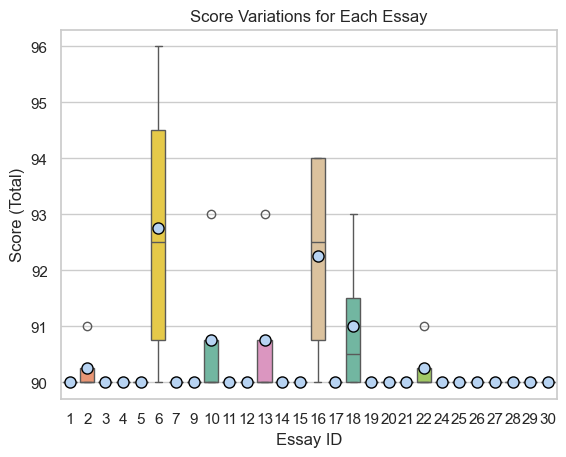

In [72]:
sns.boxplot(x=gpt['id'], y=gpt['total'], showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "#B7D3F2", "markeredgecolor": "black", "markersize": 8},
        palette="Set2")

# name the x-axis: essay id
# name the y-axis: total score
# add a title: Score Variation between GPT, Claude, Gemini, Cograder
plt.xlabel('Essay ID')
plt.ylabel('Score (Total)')
plt.title('Score Variations for Each Essay')
plt.savefig('score_variation_gpt.png', format='png')

# Show the plot
plt.show()

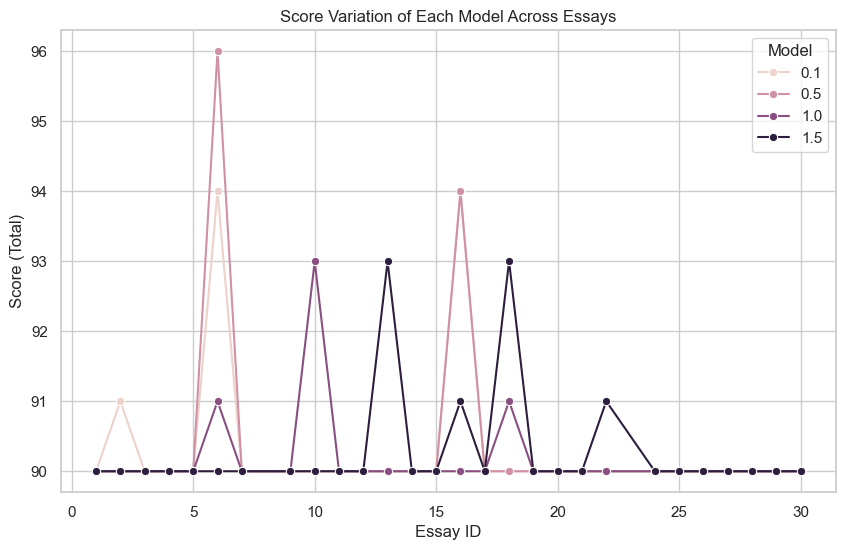

In [71]:
# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.lineplot(
    data=gpt,
    x='id',
    y='total',
    hue='temperature',
    marker='o'
)

# Customize plot
plt.title('Score Variation of Each Model Across Essays')
plt.xlabel('Essay ID')
plt.ylabel('Score (Total)')
plt.legend(title='Model', loc='upper right')  # Adjust legend location
#plt.savefig('score_variation_per_model.png', format='png')

# Show the plot
plt.show()


<Axes: xlabel='id', ylabel='total'>

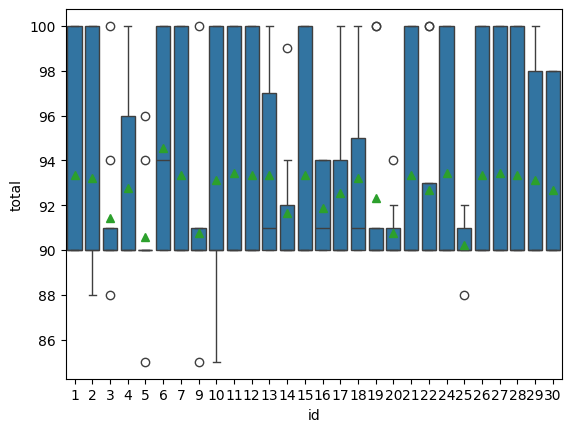

In [32]:
sns.boxplot(x=df['id'], y=df['total'], showmeans=True)